In [3]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_csv("data-breast-cancer.csv")

In [5]:
# Show some data samples
df.head()

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


This is a dataset used to detect whether a patient has breast cancer depending on the following features:

- diagnosis: (label) the diagnosis of breast (label) tissues (M = malignant, B = benign).
- radius: distances from center to points on the perimeter.
- texture: standard deviation of gray-scale values.
- perimeter: perimeter of the tumor.
- area: area of the tumor.
- smoothness: local variation in radius lengths.
- compactness: is equal to (perimeter^2 / area - 1.0).
- concavity: severity of concave portions of the contour.
- concave points: number of concave portions of the contour.
- symmetry: symmetry of the tumor shape.
- fractal dimension: "coastline approximation" - 1.



# **EXPLORATORY DATA ANALYSIS**

In [6]:
# Coppy the dataset
data=df.copy()

In [7]:
data.describe()

,Unnamed: 0,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,284.000000,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,164.400426,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,142.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,284.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,426.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,568.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


In [9]:
data.shape

(569, 12)

In [10]:
print("Continuous Columns")
numerical_cols = data.describe().columns
print(numerical_cols)
print("Categorical Columns")
categorical_cols = data.describe(include=[object]).columns
print(categorical_cols)

Continuous Columns
Index(['Unnamed: 0', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Categorical Columns
Index(['diagnosis'], dtype='object')


In [11]:
# Drop the unnamed column
data.drop(columns=["Unnamed: 0"], inplace=True)

In [12]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>],
       [<Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>],
       [<Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>],
       [<Axes: title={'center': 'fractal_dimension_mean'}>, <Axes: >,
        <Axes: >]], dtype=object)

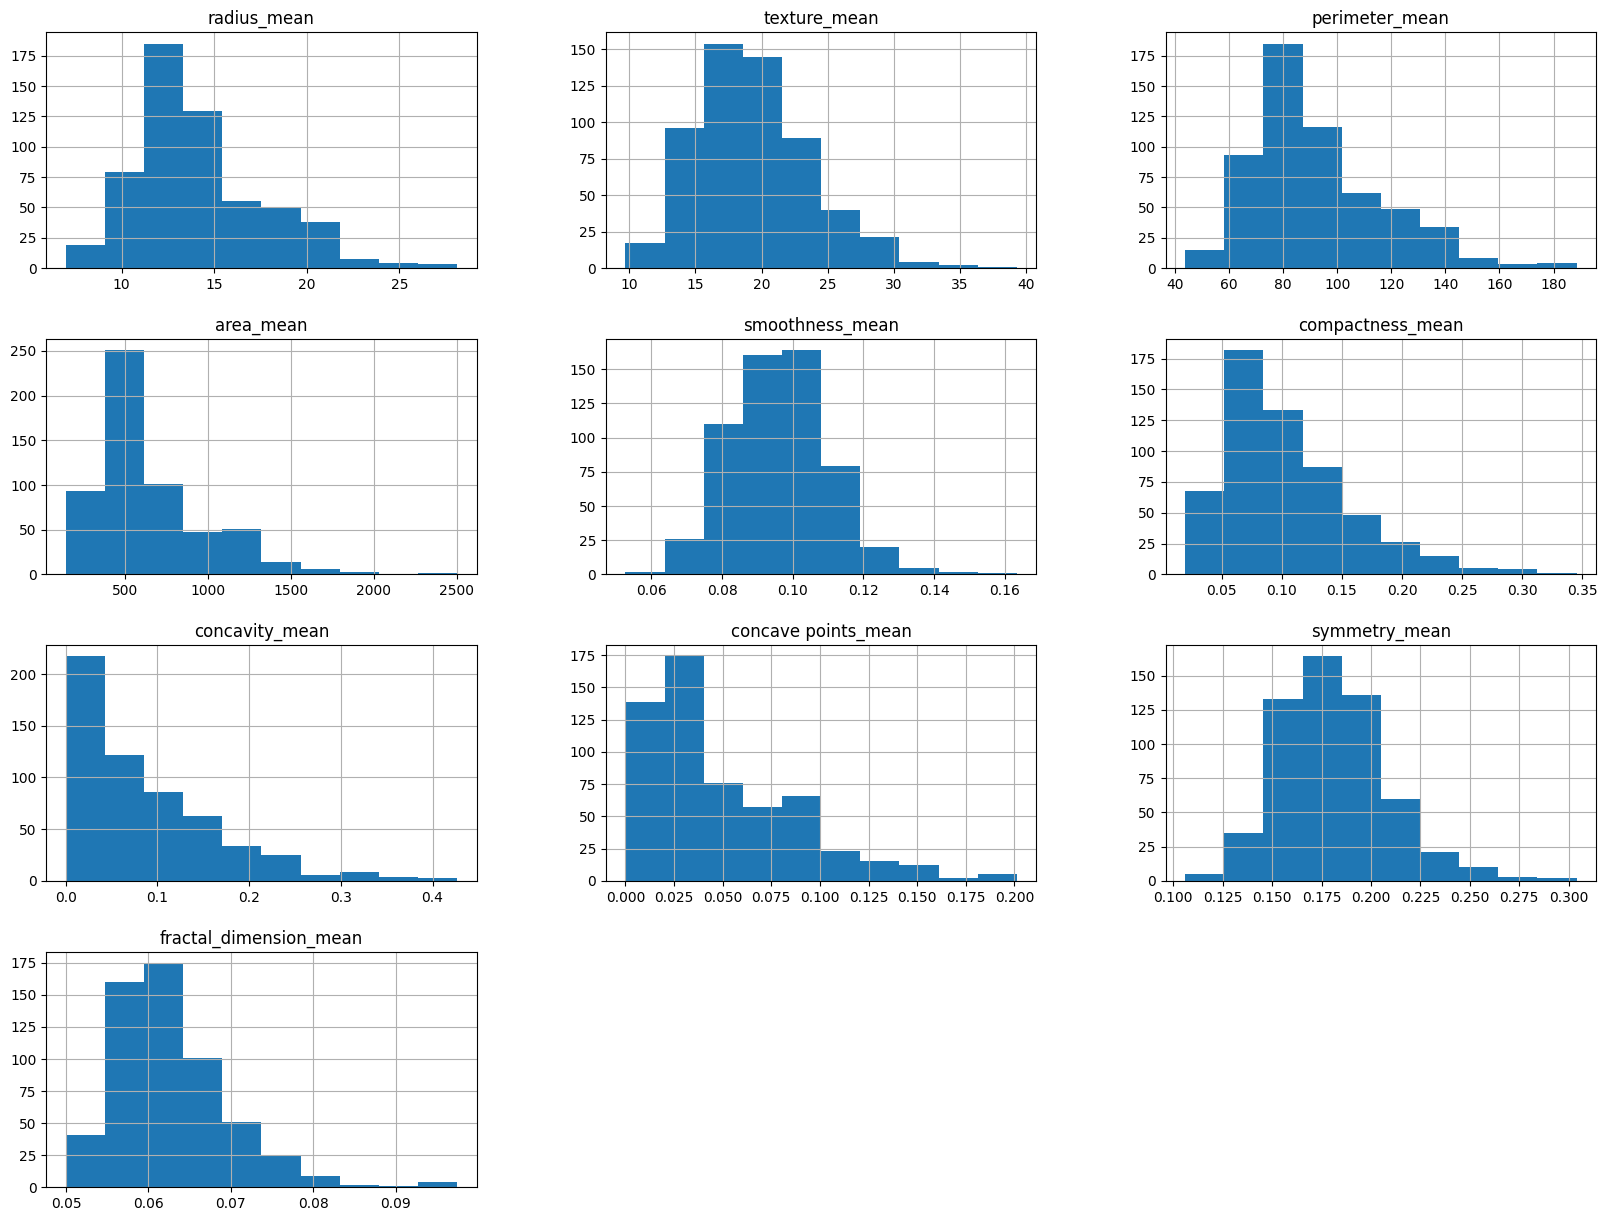

In [13]:
data.hist(figsize=(20,15))

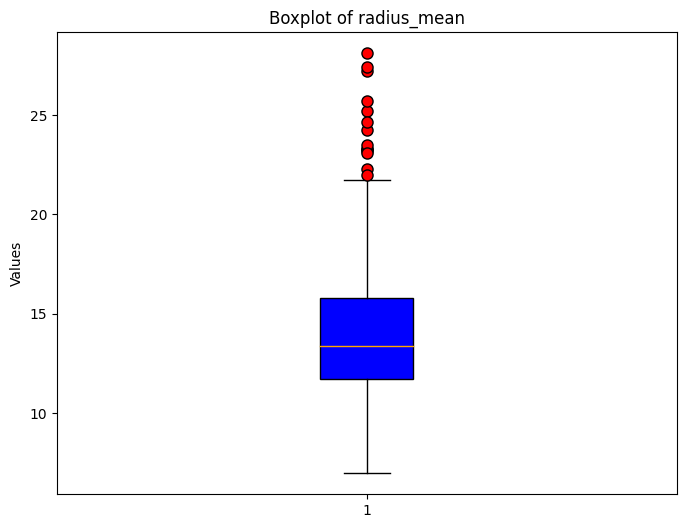

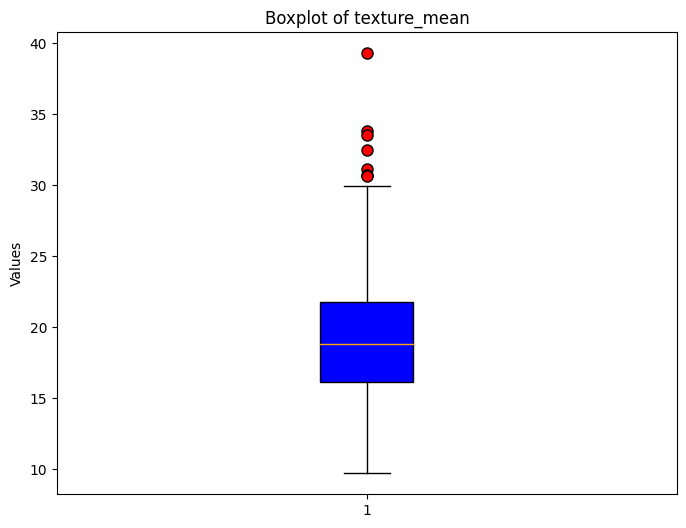

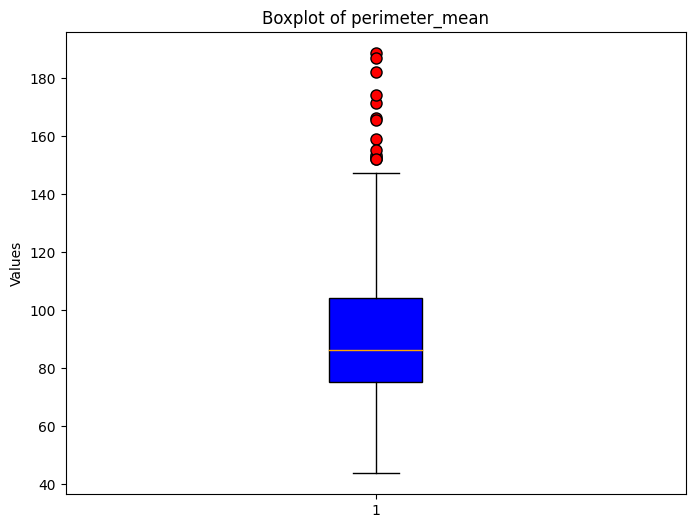

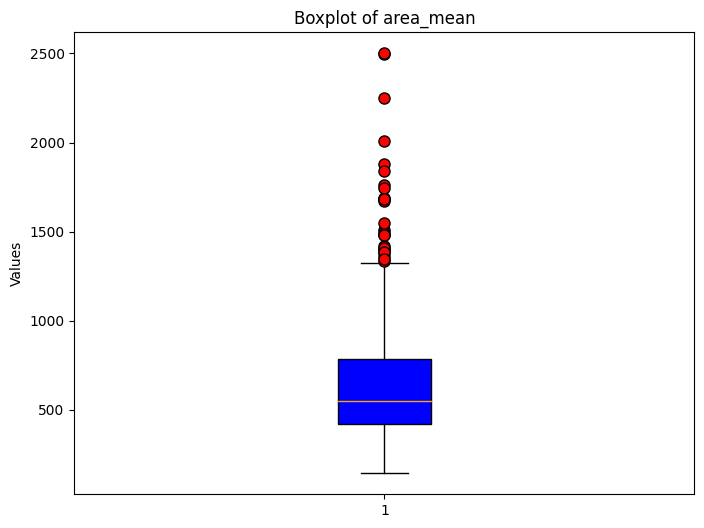

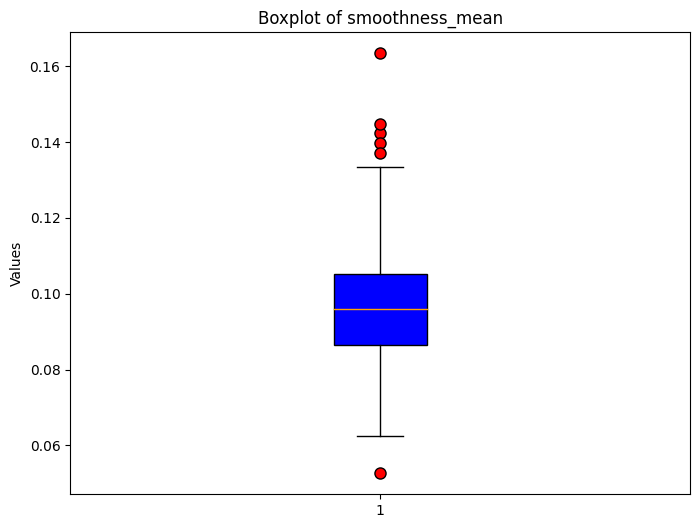

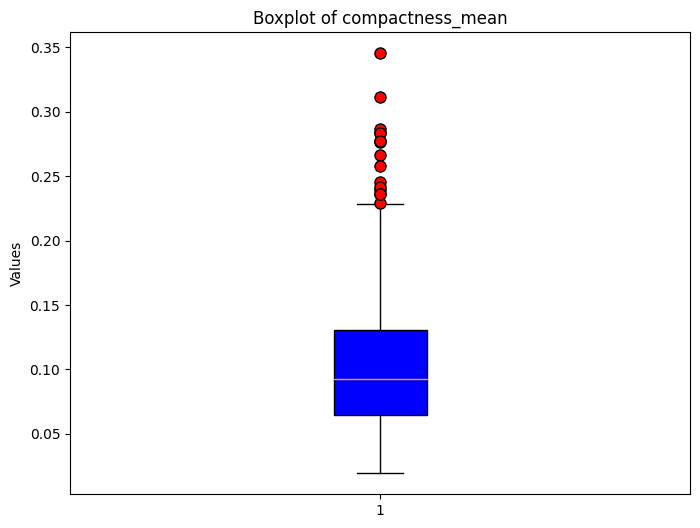

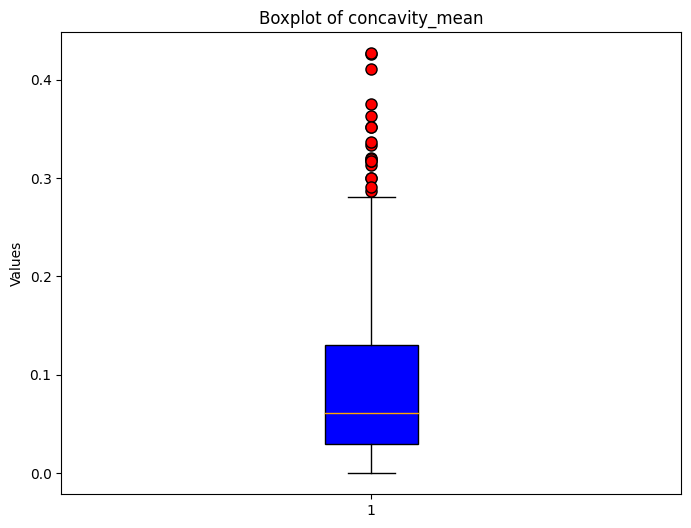

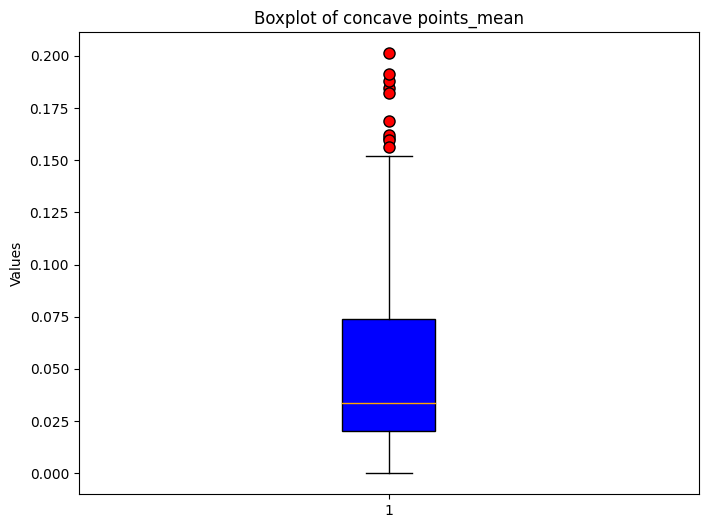

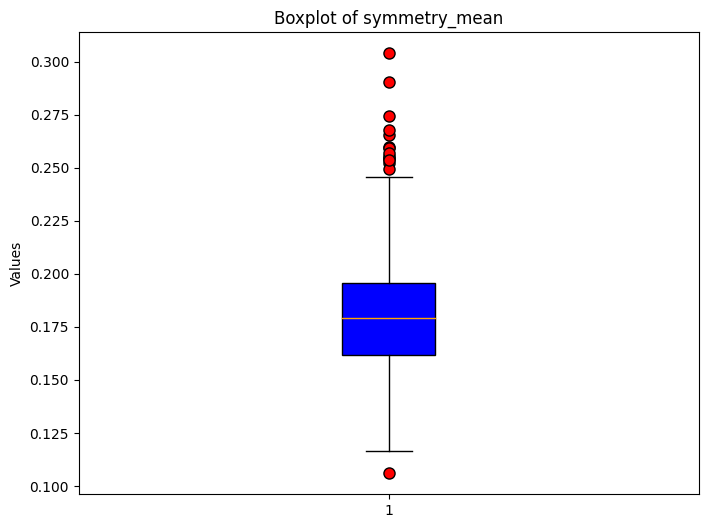

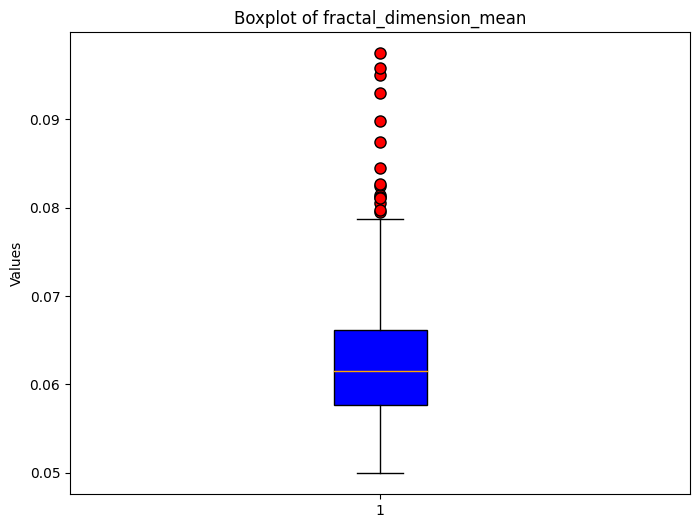

In [14]:
numerical_col = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
# Plot the boxplot for numerical attribute
for col in numerical_col:
  plt.figure(figsize=(8,6))
  plt.boxplot(data[col],
            showfliers=True,  # Show outliers
            patch_artist=True,  # Fill box with color
            boxprops=dict(facecolor='blue'),  # Box color
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'),  # Outlier properties
            medianprops=dict(color='orange'),  # Median line color
            )
  plt.title('Boxplot of {}'.format(col))
  plt.ylabel('Values')
  plt.grid(False)
  plt.show()

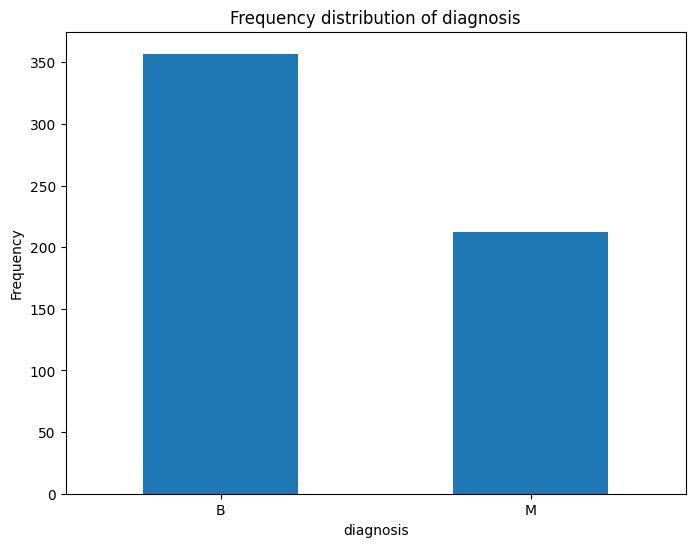

In [15]:
plt.figure(figsize=(8, 6))
data["diagnosis"].value_counts().plot(kind='bar')
plt.title(f'Frequency distribution of diagnosis')
plt.ylabel('Frequency')
plt.xticks(rotation=360)
plt.show()

In [16]:
# Convert data label to numerical values: 1 (B) or 0 (M)
data["diagnosis"] = [1 if i == "M" else 0 for i in data["diagnosis"]]

In [17]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


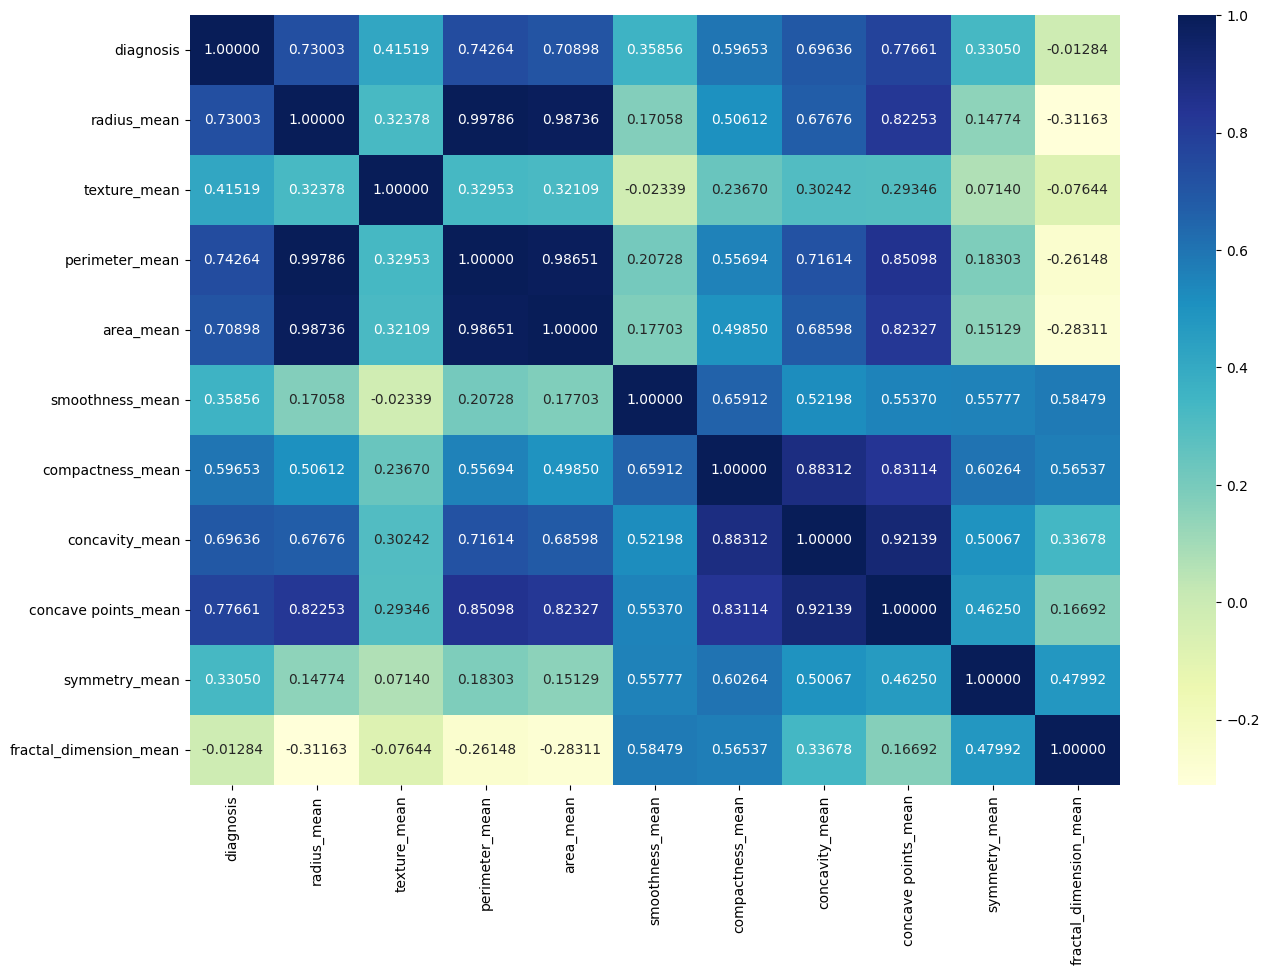

In [18]:
# Plot the heatmap to see the correlation between numerical features and label
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', fmt='.5f')
plt.show()

**Outliers Detection**

In [19]:
# check Nan values in the data
data[data.isna().any(axis=1)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean


In [20]:
# Remove outliers using IQR method
q = data['radius_mean'].quantile(0.95)
df_clean = data[data['radius_mean'] < q]

q = data['texture_mean'].quantile(0.95)
df_clean = df_clean[data['texture_mean'] < q]

q = data['perimeter_mean'].quantile(0.95)
df_clean = df_clean[data['perimeter_mean'] < q]

q = data['area_mean'].quantile(0.95)
df_clean = df_clean[data['area_mean'] < q]

q = data['smoothness_mean'].quantile(0.95)
df_clean = df_clean[data['smoothness_mean'] < q]

q = data['compactness_mean'].quantile(0.95)
df_clean = df_clean[data['compactness_mean'] < q]

q = data['concavity_mean'].quantile(0.95)
df_clean = df_clean[data['concavity_mean'] < q]

q = data['concave points_mean'].quantile(0.95)
df_clean = df_clean[data['concave points_mean'] < q]

q = data['symmetry_mean'].quantile(0.98)
df_clean = df_clean[data['symmetry_mean'] < q]

q = data['fractal_dimension_mean'].quantile(0.95)
df_clean = df_clean[data['fractal_dimension_mean'] < q]

<ipython-input-20-b2b5f25b0f4e>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[data['texture_mean'] < q]
<ipython-input-20-b2b5f25b0f4e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[data['perimeter_mean'] < q]
<ipython-input-20-b2b5f25b0f4e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[data['area_mean'] < q]
<ipython-input-20-b2b5f25b0f4e>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[data['smoothness_mean'] < q]
<ipython-input-20-b2b5f25b0f4e>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[data['compactness_mean'] < q]
<ipython-input-20-b2b5f25b0f4e>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[data['concavity_mean'] < q]
<ipython-input-20-b2b5f25b0f4e>:24

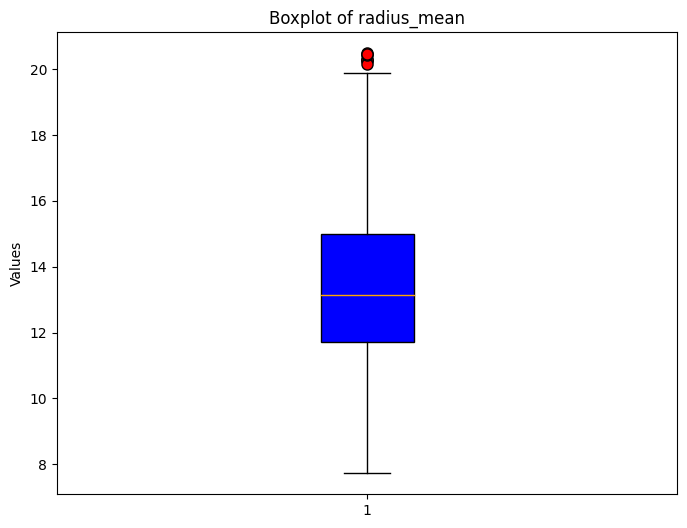

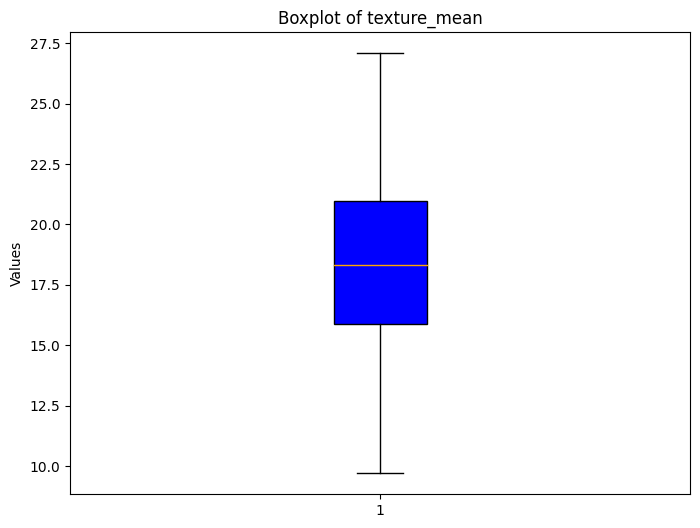

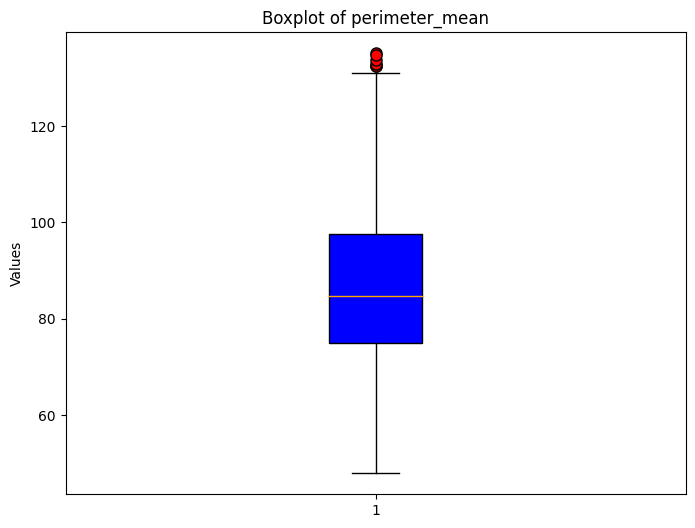

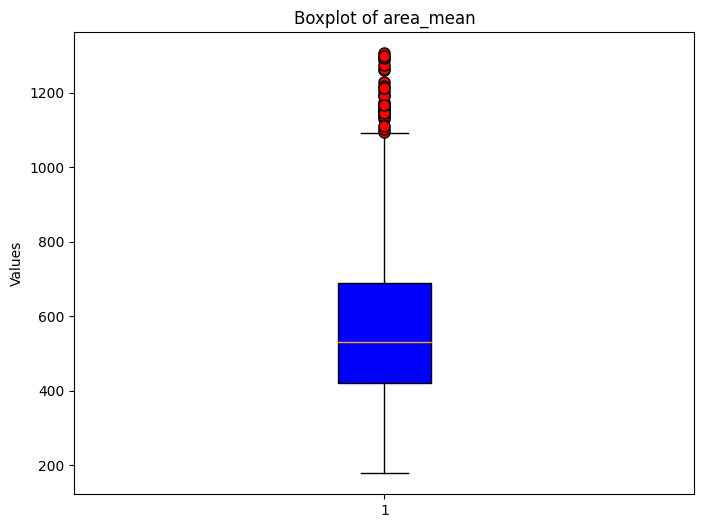

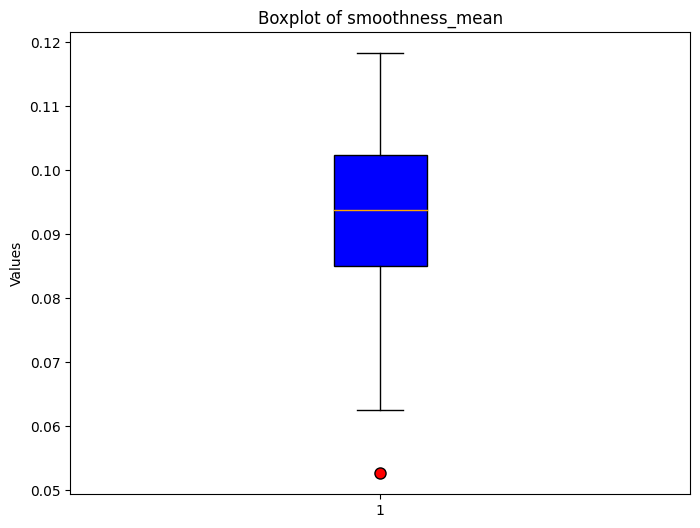

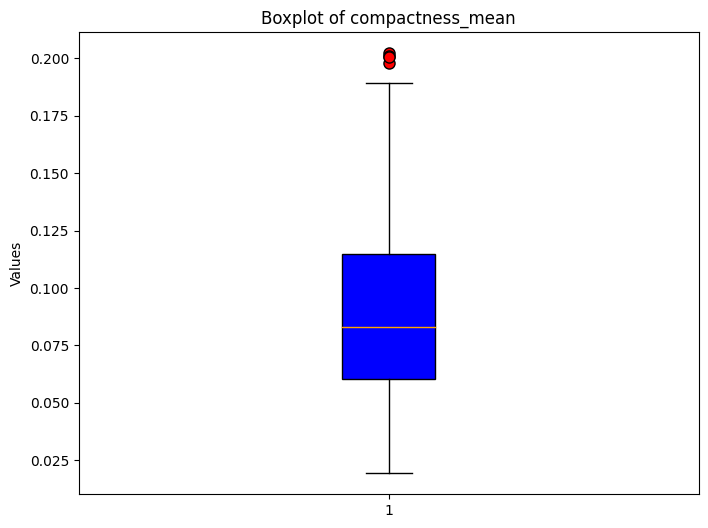

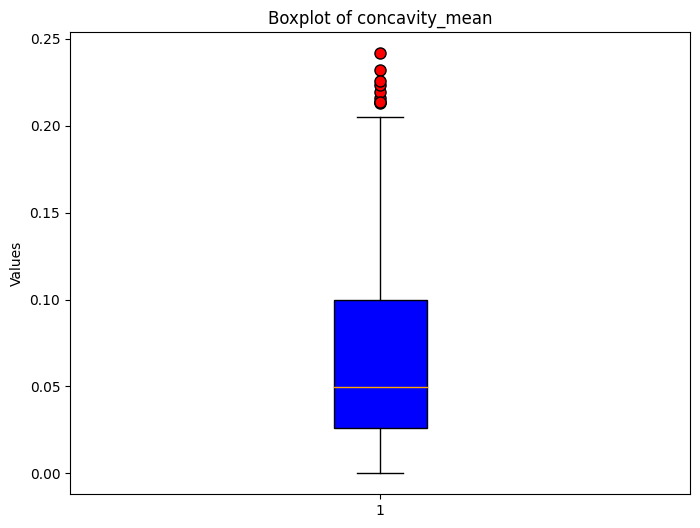

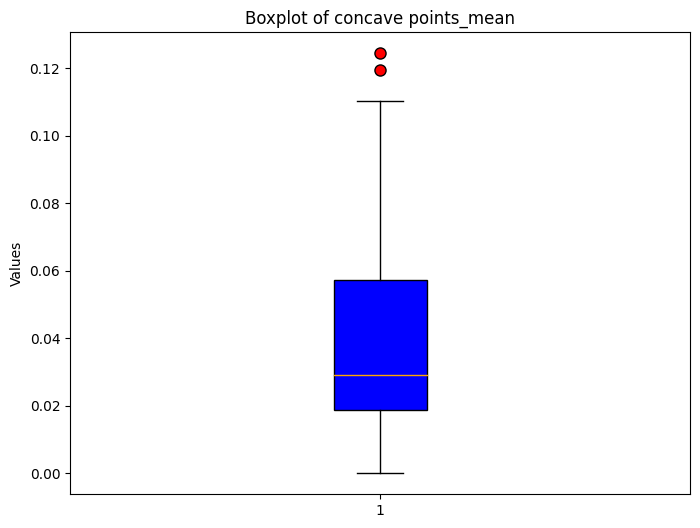

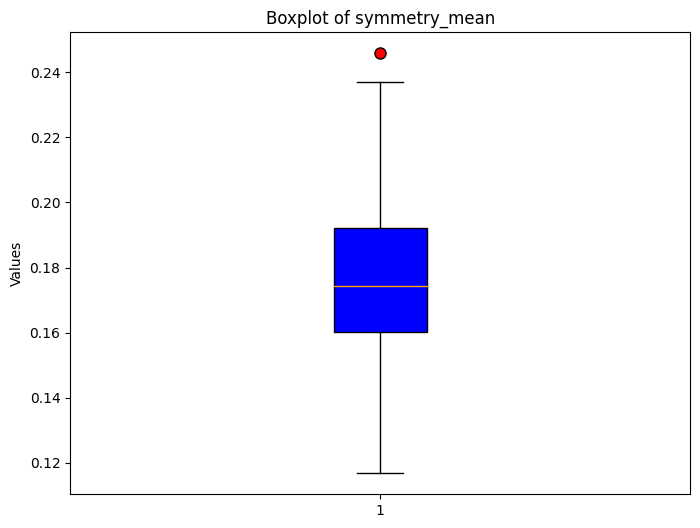

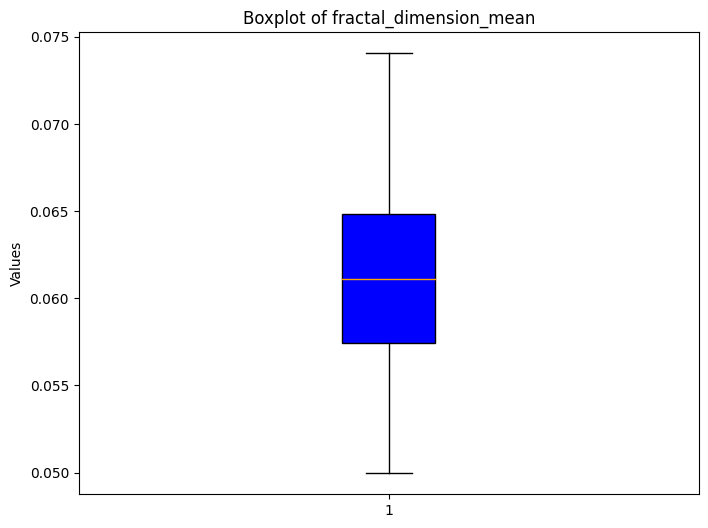

In [21]:
numerical_col = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
# Plot the boxplot for numerical attribute
for col in numerical_col:
  plt.figure(figsize=(8,6))
  plt.boxplot(df_clean[col],
            showfliers=True,  # Show outliers
            patch_artist=True,  # Fill box with color
            boxprops=dict(facecolor='blue'),  # Box color
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'),  # Outlier properties
            medianprops=dict(color='orange'),  # Median line color
            )
  plt.title('Boxplot of {}'.format(col))
  plt.ylabel('Values')
  plt.grid(False)
  plt.show()

In [22]:
df_clean.shape

(445, 11)

# **SVM Model**

In [23]:
# Separate data features by removing the data label.
X = df_clean.drop(columns=["diagnosis"], axis=1)

# Assign data label to variable y
y = df_clean.diagnosis

# Split train/test with a random state
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size=0.8)

In [24]:
# Initialize and use StandardScaler to normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized_train = scaler.fit_transform(X_train)
X_normalized_test = scaler.transform(X_test)

In [25]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_normalized_train, y_train)

SVC()

In [26]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print(classification_report(y_test, model.predict(X_normalized_test)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        63
           1       0.95      0.81      0.88        26

    accuracy                           0.93        89
   macro avg       0.94      0.90      0.91        89
weighted avg       0.93      0.93      0.93        89



In [27]:
model.score(X_normalized_test, y_test)

0.9325842696629213

**Model tuning**

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000],
              "gamma": ["scale", 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]}
gridsearch = GridSearchCV(SVC(), param_grid, cv=10, scoring="f1", verbose=1)

In [30]:
# Run grid search to find the best set of hyper-parameters
gridsearch.fit(X_normalized_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                   1, 5]},
             scoring='f1', verbose=1)

In [31]:
gridsearch.best_params_

{'C': 10, 'gamma': 0.05}

In [32]:
# Re-run SVM with the best set of hyper-parameters.
model = SVC(C=gridsearch.best_params_['C'], gamma=gridsearch.best_params_['gamma'])
model.fit(X_normalized_train, y_train)

SVC(C=10, gamma=0.05)

In [33]:
# Show evaluation metrics on the test set
print("Precision: ", precision_score(model.predict(X_normalized_test), y_test))
print("Recall:  ", recall_score(model.predict(X_normalized_test), y_test))
print(classification_report(y_test, model.predict(X_normalized_test)))

Precision:  0.8461538461538461
Recall:   0.9565217391304348
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.96      0.85      0.90        26

    accuracy                           0.94        89
   macro avg       0.95      0.92      0.93        89
weighted avg       0.94      0.94      0.94        89



In [34]:
model.score(X_normalized_test, y_test)

0.9438202247191011

# **Logistic Regression**

In [35]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_normalized_train, y_train)

LogisticRegression()

In [36]:
log_reg.score(X_normalized_test, y_test)

0.9550561797752809

In [37]:
print(classification_report(y_test, log_reg.predict(X_normalized_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        63
           1       1.00      0.85      0.92        26

    accuracy                           0.96        89
   macro avg       0.97      0.92      0.94        89
weighted avg       0.96      0.96      0.95        89



# **Naive Bayes**

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
# Define the values of hyperparameter var_smoothing we want to try
grid_search = {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1,0.5, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4,2.5, 3]}
# Initialize the GaussianNB model
naive_model = GaussianNB()
# Set up GridSearchCV to find the best value of hyperparameter var_smoothing, with 5-fold cross-validation (cv=5).
naive_cv = GridSearchCV(naive_model, grid_search, cv=5)
# Train the model using GridSearchCV
naive_cv.fit(X_normalized_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 0.5, 0.7,
                                           0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4,
                                           1.5, 1.6, 1.8, 1.9, 2, 2.1, 2.2, 2.3,
                                           2.4, 2.5, 3]})

In [40]:
# Show the best value of var_smoothing
naive_cv.best_params_

{'var_smoothing': 0.5}

In [41]:
best_var_smoothing = naive_cv.best_params_["var_smoothing"]

In [42]:
# Initialize GaussianNB model with the best var_smoothing
best_naive_model = GaussianNB(var_smoothing=best_var_smoothing)
# Train the model with the best hyperparameter
best_naive_model.fit(X_normalized_train, y_train)

GaussianNB(var_smoothing=0.5)

In [43]:
best_naive_model.score(X_normalized_test, y_test)

0.9213483146067416

In [44]:
print(classification_report(y_test, best_naive_model.predict(X_normalized_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.91      0.81      0.86        26

    accuracy                           0.92        89
   macro avg       0.92      0.89      0.90        89
weighted avg       0.92      0.92      0.92        89



# **Decision Tree**

In [45]:
print("Before oversampling: " + str(X_normalized_train.shape))
print(np.unique(y_train, return_counts=True))

Before oversampling: (356, 10)
(array([0, 1]), array([249, 107]))


In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=5)
X_train_oversampling, y_train_oversampling = smote.fit_resample(X_normalized_train, y_train)

In [47]:
# Before oversampling
print("Before oversampling: " + str(X_normalized_train.shape))
print(np.unique(y_train, return_counts=True))
# After oversampling
print("After oversampling: " + str(X_train_oversampling.shape))
print(np.unique(y_train_oversampling, return_counts=True))

Before oversampling: (356, 10)
(array([0, 1]), array([249, 107]))
After oversampling: (498, 10)
(array([0, 1]), array([249, 249]))


In [48]:
# Import GridSearchCV for finding the best hyper-parameter set.
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
params = {"criterion": ["gini", "entropy"],
         "max_depth": [3, 5],
         "min_samples_split": [4,8]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5)

In [49]:
# Run the search on oversampled training data samples.
grid_search.fit(X_normalized_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'min_samples_split': [4, 8]})

In [50]:
# Build a decision tree model pipeline from the best set of hyper-parameters found
model_dt = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'], max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])

In [51]:
# Train the decision tree model
model_dt.fit(X_train_oversampling, y_train_oversampling)

DecisionTreeClassifier(max_depth=3, min_samples_split=4)

In [52]:
model_dt.score(X_normalized_test, y_test)

0.9325842696629213

# **Random Forest**

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Train a Random Forest classifier
rf = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_normalized_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [55]:
# Best number of Trees.
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'n_estimators': 50}


In [56]:
rf_best.score(X_normalized_test, y_test)

0.9325842696629213

**Testing**

In [57]:
print("Classification report of Logistic regression: \n", classification_report(log_reg.predict(X_normalized_test), y_test))
print("Classification report of Decision Tree: \n", classification_report(model_dt.predict(X_normalized_test), y_test))
print("Classification report of Naive Bayes: \n", classification_report(best_naive_model.predict(X_normalized_test), y_test))
print("Classification report of random forest: \n", classification_report(rf_best.predict(X_normalized_test), y_test))

Classification report of Logistic regression: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        67
           1       0.85      1.00      0.92        22

    accuracy                           0.96        89
   macro avg       0.92      0.97      0.94        89
weighted avg       0.96      0.96      0.96        89

Classification report of Decision Tree: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        61
           1       0.92      0.86      0.89        28

    accuracy                           0.93        89
   macro avg       0.93      0.91      0.92        89
weighted avg       0.93      0.93      0.93        89

Classification report of Naive Bayes: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95        66
           1       0.81      0.91      0.86        23

    accuracy                           0.92        8

In [58]:
print("Logistic Regression")
print("Precision: ", precision_score(log_reg.predict(X_normalized_test), y_test))
print("Recall: ", recall_score(log_reg.predict(X_normalized_test), y_test))
print("Decision Tree")
print("Precision: ", precision_score(model_dt.predict(X_normalized_test), y_test))
print("Recall:  ", recall_score(model_dt.predict(X_normalized_test), y_test))
print("Naive Bayes")
print("Precision: ", precision_score(best_naive_model.predict(X_normalized_test), y_test))
print("Recall:  ", recall_score(best_naive_model.predict(X_normalized_test), y_test))
print("Random Forest")
print("Precision: ", precision_score(rf_best.predict(X_normalized_test), y_test))
print("Recall:  ", recall_score(rf_best.predict(X_normalized_test), y_test))

Logistic Regression
Precision:  0.8461538461538461
Recall:  1.0
Decision Tree
Precision:  0.9230769230769231
Recall:   0.8571428571428571
Naive Bayes
Precision:  0.8076923076923077
Recall:   0.9130434782608695
Random Forest
Precision:  0.8461538461538461
Recall:   0.9166666666666666


Overall, Logistic Regression exhibits the highest performance, achieving a remarkable accuracy score of 95.5%. Additionally, SVM outperforms Naive Bayes, Logistic Regression, and Decision Tree models, achieving an accuracy score of 94%

# **Model Ensemble**

In [59]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

**Stacking**

In [60]:
# Ensemble the four models using hard (majority) voting
estimators=[('decision_tree', model_dt), ('naive_bayes', best_naive_model), ('rf', rf_best), ('log_reg', log_reg)]
ensemble = VotingClassifier(estimators, voting='hard')

In [61]:
# Train the model ensemble on the training set
ensemble.fit(X_normalized_train, y_train)
ensemble.score(X_normalized_test, y_test)

0.9325842696629213

In [62]:
pred_y = ensemble.predict(X_normalized_test)
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.92      0.85      0.88        26

    accuracy                           0.93        89
   macro avg       0.93      0.91      0.92        89
weighted avg       0.93      0.93      0.93        89



**Bagging**

In [63]:
base_log = LogisticRegression(solver='lbfgs', max_iter=1000)
base_naive = GaussianNB(var_smoothing=0.1)
base_dt = DecisionTreeClassifier()
base_rf = RandomForestClassifier(n_estimators=200)

In [64]:
# Create a Bagging Classifier with logistic regression as the base model
bagging_clf_log = BaggingClassifier(estimator=base_log, n_estimators=5, max_samples=0.5)
bagging_clf_log.fit(X_normalized_train, y_train)

BaggingClassifier(estimator=LogisticRegression(max_iter=1000), max_samples=0.5,
                  n_estimators=5)

In [65]:
# Making predictions on the test set
y_pred_log = bagging_clf_log.predict(X_normalized_test)

# Evaluating the accuracy of the model
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy of Bagging with logistic:", accuracy_log)

Accuracy of Bagging with logistic: 0.9662921348314607


In [66]:
# Create a Bagging Classifier with Naive Bayes as the base model
bagging_clf_naive = BaggingClassifier(estimator=base_naive, n_estimators=10, max_samples=0.5)
bagging_clf_naive.fit(X_normalized_train, y_train)

BaggingClassifier(estimator=GaussianNB(var_smoothing=0.1), max_samples=0.5)

In [67]:
# Making predictions on the test set
y_pred_naive = bagging_clf_naive.predict(X_normalized_test)

# Evaluating the accuracy of the model
accuracy_naive = accuracy_score(y_test, y_pred_naive)
print("Accuracy of Bagging with Naive bayes:", accuracy_naive)

Accuracy of Bagging with Naive bayes: 0.9101123595505618


In [68]:
# Create a Bagging Classifier with Naive Bayes as the base model
bagging_clf_dt = BaggingClassifier(estimator=base_dt, n_estimators=5, max_samples=0.5)
bagging_clf_dt.fit(X_normalized_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=5)

In [69]:
# Making predictions on the test set
y_pred_dt = bagging_clf_dt.predict(X_normalized_test)

# Evaluating the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Bagging with Decision tree:", accuracy_dt)

Accuracy of Bagging with Decision tree: 0.9438202247191011


In [70]:
# Create a Bagging Classifier with Random forest as the base model
bagging_clf_rf = BaggingClassifier(estimator=base_rf, n_estimators=8, max_samples=0.5)
bagging_clf_rf.fit(X_normalized_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(n_estimators=200),
                  max_samples=0.5, n_estimators=8)

In [71]:
# Making predictions on the test set
y_pred_rf = bagging_clf_rf.predict(X_normalized_test)

# Evaluating the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Bagging with Random forest:", accuracy_rf)

Accuracy of Bagging with Random forest: 0.9101123595505618


# **Boosting with AdaBoost, Gradient Boosting and XGBoost**

**Ada Boost**

In [72]:
ada_clf_log = AdaBoostClassifier(estimator = base_log, n_estimators=8)

# Train the AdaBoost Classifier
ada_clf_log.fit(X_normalized_train, y_train)

# Making predictions on the test set
y_pred_ada_log = ada_clf_log.predict(X_normalized_test)

# Evaluating the accuracy of the model
accuracy_ada_log = accuracy_score(y_test, y_pred_ada_log)
print("AdaBoost Classifier Accuracy with logistic regression:", accuracy_ada_log)

AdaBoost Classifier Accuracy with logistic regression: 0.9438202247191011


In [73]:
ada_clf_naive = AdaBoostClassifier(estimator = base_naive, n_estimators=100)

# Train the AdaBoost Classifier
ada_clf_naive.fit(X_normalized_train, y_train)

# Making predictions on the test set
y_pred_ada_naive = ada_clf_naive.predict(X_normalized_test)

# Evaluating the accuracy of the model
accuracy_ada_naive = accuracy_score(y_test, y_pred_ada_naive)
print("AdaBoost Classifier Accuracy with naive bayes:", accuracy_ada_naive)

AdaBoost Classifier Accuracy with naive bayes: 0.9325842696629213


In [74]:
ada_clf_dt = AdaBoostClassifier(estimator = base_dt, n_estimators=10)

# Train the AdaBoost Classifier
ada_clf_dt.fit(X_normalized_train, y_train)

# Making predictions on the test set
y_pred_ada_dt = ada_clf_log.predict(X_normalized_test)

# Evaluating the accuracy of the model
accuracy_ada_dt = accuracy_score(y_test, y_pred_ada_dt)
print("AdaBoost Classifier Accuracy with decision tree:", accuracy_ada_dt)

AdaBoost Classifier Accuracy with decision tree: 0.9438202247191011


In [75]:
ada_clf_rf = AdaBoostClassifier(estimator = base_rf, n_estimators=5)

# Train the AdaBoost Classifier
ada_clf_rf.fit(X_normalized_train, y_train)

# Making predictions on the test set
y_pred_ada_rf = ada_clf_rf.predict(X_normalized_test)

# Evaluating the accuracy of the model
accuracy_ada_rf = accuracy_score(y_test, y_pred_ada_rf)
print("AdaBoost Classifier Accuracy with random forest:", accuracy_ada_rf)

AdaBoost Classifier Accuracy with random forest: 0.9325842696629213


**Gradient Boosting**

In [76]:
gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.4)

# Train the Gradient Boosting Classifier
gb_clf.fit(X_normalized_train, y_train)

# Making predictions on the test set
y_pred_gb = gb_clf.predict(X_normalized_test)

# Evaluating the accuracy of the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)

Gradient Boosting Classifier Accuracy: 0.9213483146067416


**XGBoost**

In [77]:
xgb_clf = XGBClassifier(n_estimators=200, learning_rate=0.1)

# Train the XGBoost Classifier
xgb_clf.fit(X_normalized_train, y_train)

# Making predictions on the test set
y_pred_xgb = xgb_clf.predict(X_normalized_test)

# Evaluating the accuracy of the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)

XGBoost Classifier Accuracy: 0.9438202247191011


**Observation**
- Individual Logistics Regression model has the highest accuracy among individual models (0.955).
- Model ensembles generally perform better than individual models, especially Bagging Ensemble with Logistics and AdaBoost with Decision Tree achieving the highest accuracy (0.966 and 0.943 respectively).

**Conclusion**
- Model ensembles, particularly AdaBoost with Decision Tree or XGBoost outperform individual models, indicating the effectiveness of combining multiple models.

